## Installation des librairies

In [1]:
%%capture capt
!pip install lifelines
!pip install tqdm
from tqdm import tqdm
import numpy as np
import pandas as pd

## Importation des bases de données anonymisées

In [2]:
hospit_non_chr=pd.read_csv("base_hospit_non_chr_anonyme.csv")
hospit_full_hospit=pd.read_csv("base_full_hospit_anonyme.csv")
consommant=pd.read_csv("consommant_anonyme.csv")
patient=pd.read_csv("patient_anonyme.csv")

/tmp/ipykernel_136/1509498775.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  hospit_non_chr=pd.read_csv("base_hospit_non_chr_anonyme.csv")
/tmp/ipykernel_136/1509498775.py:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  hospit_full_hospit=pd.read_csv("base_full_hospit_anonyme.csv")


## Mise au bon point format

In [3]:
hospit_non_chr

,RSA_NUM,ETA_NUM,EXE_SOI_DTD,SEJ_NBJ,GRG_GHM,DGN_PAL,DGN_REL,BEN_NIR_IDT,Mort,Nb_survie,CHOC,HEMOD,CHIMIO,Radiotherapie,Transfusion
0,144689,310781406,2011-11-22,2.0,05K051,I2100,NaN,P0,False,2596,0,0,0,0,0
1,2763,110780061,2011-11-24,8.0,05M042,I21000,NaN,P0,False,2596,0,0,0,0,0
2,15548,110780061,2011-12-08,0.0,05M16T,I255,NaN,P0,False,2596,0,0,0,0,0
3,5260,110780061,2012-03-04,1.0,05M09T,I501,NaN,P0,False,2596,0,0,0,0,0
4,112258,310781406,2012-03-05,7.0,05M092,I501,NaN,P0,False,2596,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85589,16969,130784713,2013-02-21,30.0,04M174,J91,NaN,P24308,True,484,0,0,0,0,0
85590,15396,810000331,2010-12-18,17.0,08C322,S8221,NaN,P24310,False,2935,0,0,0,0,0
85591,4738,810000331,2011-01-07,0.0,08C14J,Z470,NaN,P24310,False,2935,0,0,0,0,0
85592,14458,810000331,2011-01-26,7.0,08C322,S8221,NaN,P24310,False,2935,0,0,0,0,0


In [4]:
patient

,date_h0,ALD_before,y_nais,BEN_RES_DPT,BEN_SEX_COD,dte_deces,CODE_PATIENT,Mort,Nb_survie
0,2011-11-22,0,1949,11,1,NaN,P0,False,2596
1,2013-12-05,0,1929,14,2,2015-03,P6,True,456
2,2015-07-02,0,1967,54,2,2015-08,P8,True,41
3,2011-05-19,0,1959,974,1,NaN,P13,False,2783
4,2010-03-18,0,1947,76,1,NaN,P16,False,3210
...,...,...,...,...,...,...,...,...,...
10047,2014-02-08,0,1920,29,1,2014-12,P24302,True,318
10048,2012-02-09,0,1927,61,1,2017-05,P24303,True,1924
10049,2010-07-27,0,1924,999,1,2010-08,P24304,True,5
10050,2011-11-25,0,1925,13,2,2013-03,P24308,True,484


In [5]:
patient["date_h0"]=pd.to_datetime(patient["date_h0"])
patient["dte_deces"]=pd.to_datetime(patient["dte_deces"])

In [6]:
patient

,date_h0,ALD_before,y_nais,BEN_RES_DPT,BEN_SEX_COD,dte_deces,CODE_PATIENT,Mort,Nb_survie
0,2011-11-22,0,1949,11,1,NaT,P0,False,2596
1,2013-12-05,0,1929,14,2,2015-03-01,P6,True,456
2,2015-07-02,0,1967,54,2,2015-08-01,P8,True,41
3,2011-05-19,0,1959,974,1,NaT,P13,False,2783
4,2010-03-18,0,1947,76,1,NaT,P16,False,3210
...,...,...,...,...,...,...,...,...,...
10047,2014-02-08,0,1920,29,1,2014-12-01,P24302,True,318
10048,2012-02-09,0,1927,61,1,2017-05-01,P24303,True,1924
10049,2010-07-27,0,1924,999,1,2010-08-01,P24304,True,5
10050,2011-11-25,0,1925,13,2,2013-03-01,P24308,True,484


In [7]:
#patient["Nb_survie"]=patient["dte_deces"]-patient["date_h0"]
#patient["Mort"]= [x.days>0 for x in patient["Nb_survie"]]
#patient=patient.drop(columns=["Survie"])

In [7]:
patient

,date_h0,ALD_before,y_nais,BEN_RES_DPT,BEN_SEX_COD,dte_deces,CODE_PATIENT,Mort,Nb_survie
0,2011-11-22,0,1949,11,1,NaT,P0,False,2596
1,2013-12-05,0,1929,14,2,2015-03-01,P6,True,456
2,2015-07-02,0,1967,54,2,2015-08-01,P8,True,41
3,2011-05-19,0,1959,974,1,NaT,P13,False,2783
4,2010-03-18,0,1947,76,1,NaT,P16,False,3210
...,...,...,...,...,...,...,...,...,...
10047,2014-02-08,0,1920,29,1,2014-12-01,P24302,True,318
10048,2012-02-09,0,1927,61,1,2017-05-01,P24303,True,1924
10049,2010-07-27,0,1924,999,1,2010-08-01,P24304,True,5
10050,2011-11-25,0,1925,13,2,2013-03-01,P24308,True,484


In [8]:
patient


,date_h0,ALD_before,y_nais,BEN_RES_DPT,BEN_SEX_COD,dte_deces,CODE_PATIENT,Mort,Nb_survie
0,2011-11-22,0,1949,11,1,NaT,P0,False,2596
1,2013-12-05,0,1929,14,2,2015-03-01,P6,True,456
2,2015-07-02,0,1967,54,2,2015-08-01,P8,True,41
3,2011-05-19,0,1959,974,1,NaT,P13,False,2783
4,2010-03-18,0,1947,76,1,NaT,P16,False,3210
...,...,...,...,...,...,...,...,...,...
10047,2014-02-08,0,1920,29,1,2014-12-01,P24302,True,318
10048,2012-02-09,0,1927,61,1,2017-05-01,P24303,True,1924
10049,2010-07-27,0,1924,999,1,2010-08-01,P24304,True,5
10050,2011-11-25,0,1925,13,2,2013-03-01,P24308,True,484


In [9]:
hospit_full_hospit

,RSA_NUM,ETA_NUM,EXE_SOI_DTD,SEJ_NBJ,GRG_GHM,DGN_PAL,DGN_REL,BEN_NIR_IDT,Mort,Nb_survie,CHOC,HEMOD,CHIMIO,Radiotherapie,Transfusion
0,144689,310781406,2011-11-22,2.0,05K051,I2100,NaN,P0,False,2596,0,0,0,0,0
1,2763,110780061,2011-11-24,8.0,05M042,I21000,NaN,P0,False,2596,0,0,0,0,0
2,15548,110780061,2011-12-08,0.0,05M16T,I255,NaN,P0,False,2596,0,0,0,0,0
3,5260,110780061,2012-03-04,1.0,05M09T,I501,NaN,P0,False,2596,0,0,0,0,0
4,112258,310781406,2012-03-05,7.0,05M092,I501,NaN,P0,False,2596,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156331,16969,130784713,2013-02-21,30.0,04M174,J91,NaN,P24308,True,484,0,0,0,0,0
156332,15396,810000331,2010-12-18,17.0,08C322,S8221,NaN,P24310,False,2935,0,0,0,0,0
156333,4738,810000331,2011-01-07,0.0,08C14J,Z470,NaN,P24310,False,2935,0,0,0,0,0
156334,14458,810000331,2011-01-26,7.0,08C322,S8221,NaN,P24310,False,2935,0,0,0,0,0


In [36]:
hospit_non_chr

,RSA_NUM,ETA_NUM,EXE_SOI_DTD,SEJ_NBJ,GRG_GHM,DGN_PAL,DGN_REL,BEN_NIR_IDT,Mort,Nb_survie,CHOC,HEMOD,CHIMIO,Radiotherapie,Transfusion
0,144689,310781406,2011-11-22,2.0,05K051,I2100,NaN,P0,False,2596,0,0,0,0,0
1,2763,110780061,2011-11-24,8.0,05M042,I21000,NaN,P0,False,2596,0,0,0,0,0
2,15548,110780061,2011-12-08,0.0,05M16T,I255,NaN,P0,False,2596,0,0,0,0,0
3,5260,110780061,2012-03-04,1.0,05M09T,I501,NaN,P0,False,2596,0,0,0,0,0
4,112258,310781406,2012-03-05,7.0,05M092,I501,NaN,P0,False,2596,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85589,16969,130784713,2013-02-21,30.0,04M174,J91,NaN,P24308,True,484,0,0,0,0,0
85590,15396,810000331,2010-12-18,17.0,08C322,S8221,NaN,P24310,False,2935,0,0,0,0,0
85591,4738,810000331,2011-01-07,0.0,08C14J,Z470,NaN,P24310,False,2935,0,0,0,0,0
85592,14458,810000331,2011-01-26,7.0,08C322,S8221,NaN,P24310,False,2935,0,0,0,0,0


## Début de la modélisation: Cox sur full hospit sans stratification

In [88]:
from lifelines import CoxPHFitter
cph = CoxPHFitter()
cph.fit(hospit_full_hospit[['Nb_survie','Mort','CHOC','HEMOD','CHIMIO','Radiotherapie','Transfusion']], duration_col='Nb_survie', event_col='Mort')

cph.print_summary()  # access the individual results using cph.summary


<lifelines.CoxPHFitter: fitted with 156336 total observations, 53708 right-censored observations>
             duration col = 'Nb_survie'
                event col = 'Mort'
      baseline estimation = breslow
   number of observations = 156336
number of events observed = 102628
   partial log-likelihood = -1159734.74
         time fit was run = 2023-01-30 12:57:16 UTC

---
                coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                             
CHOC            0.51       1.67       0.05             0.41             0.62                 1.51                 1.86
HEMOD           0.06       1.06       0.01             0.05             0.07                 1.05                 1.08
CHIMIO          0.56       1.75       0.01             0.54             0.58                 1.71                 1.79
Radiotherapie   0.30       1.35       0.02             0.27             0.33                 1.30                 1.39
Transfusion     0.16       1.18       0.03             0.11             0.21                 1.12                 1.24

                cmp to     z      p   -log2(p)
covariate                                     
CHOC              0.00  9.67 <0.005      71.06
HEMOD             0.00  8.67 <0.005      57.70
CHIMIO            0.00 48.95 <0.005        inf
Radiotherapie     0.00 18.02 <0.005     238.82
Transfusion       0.00  6.38 <0.005      32.42
---
Concordance = 0.52
Partial AIC = 2319479.48
log-likelihood ratio test = 2367.80 on 5 df
-log2(p) of ll-ratio test = inf

Text(0, 0.5, 'Probabilité de survie')

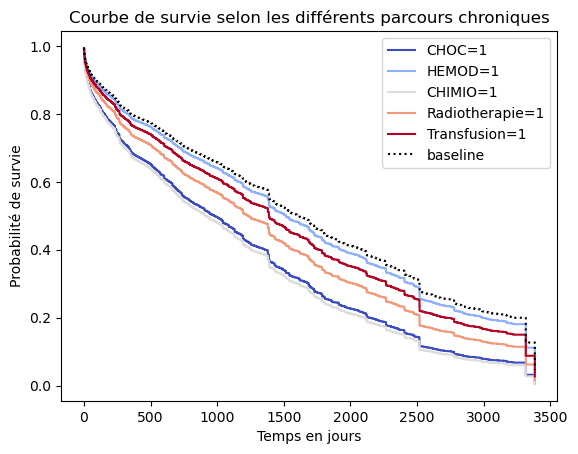

In [94]:
cph.plot_partial_effects_on_outcome(covariates=['CHOC','HEMOD','CHIMIO','Radiotherapie','Transfusion'], values=[(1,0,0,0,0),(0,1,0,0,0),(0,0,1,0,0),(0,0,0,1,0),(0,0,0,0,1)], cmap='coolwarm')
# cph.plot_partial_effects_on_outcome(covariates=['HEMOD','CHIMIO','Radiotherapie'], values=[(1,0,0),(0,1,0),(0,0,1)], cmap='coolwarm')
plt.title("Courbe de survie selon les différents parcours chroniques")
plt.xlabel("Temps en jours")
plt.ylabel("Probabilité de survie")

In [40]:
cph.params_

covariate
CHOC             0.514217
HEMOD            0.059954
CHIMIO           0.558402
Radiotherapie    0.298009
Transfusion      0.164111
Name: coef, dtype: float64

In [95]:
cph.confidence_intervals_

,95% lower-bound,95% upper-bound
covariate,,
CHOC,0.409989,0.618445
HEMOD,0.046402,0.073506
CHIMIO,0.536043,0.580760
Radiotherapie,0.265602,0.330417
Transfusion,0.113719,0.214502


In [41]:
cph.baseline_hazard_

,baseline hazard
0.0,0.005701
1.0,0.005121
2.0,0.008168
3.0,0.003369
4.0,0.005219
...,...
3284.0,0.000000
3285.0,0.000000
3286.0,0.000000
3316.0,0.490419


<AxesSubplot: xlabel='log(HR) (95% CI)'>

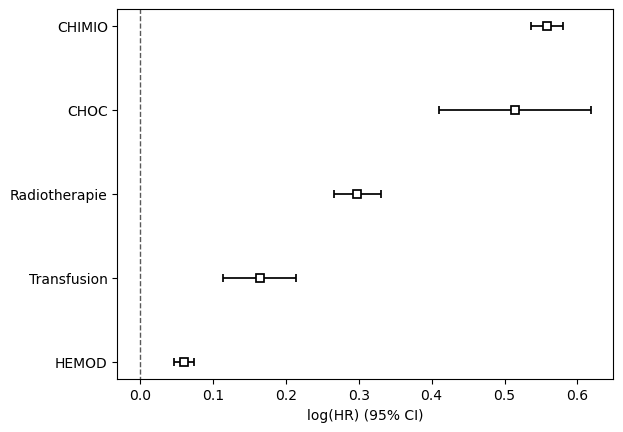

In [42]:
cph.plot()

In [ ]:
cph.check_assumptions(hospit_full_hospit[['Nb_survie','Mort','CHOC','HEMOD','CHIMIO','Radiotherapie','Transfusion']], p_value_threshold=0.05, show_plots=True)

## Modélisation: Cox avec stratification

In [44]:
#Avec Stratification
cph = CoxPHFitter()
cph.fit(hospit_full_hospit[['Nb_survie','Mort','CHOC','HEMOD','CHIMIO','Radiotherapie','Transfusion']], duration_col='Nb_survie', event_col='Mort',strata=['CHOC','HEMOD','CHIMIO','Radiotherapie','Transfusion'])

cph.print_summary()  # access the individual results using cph.summary


<lifelines.CoxPHFitter: fitted with 156336 total observations, 53708 right-censored observations>
             duration col = 'Nb_survie'
                event col = 'Mort'
                   strata = ['CHOC', 'HEMOD', 'CHIMIO', 'Radiotherapie', 'Transfusion']
      baseline estimation = breslow
   number of observations = 156336
number of events observed = 102628
   partial log-likelihood = -1043546.39
         time fit was run = 2023-01-30 12:21:33 UTC

---
Empty DataFrame
Columns: [ coef,  exp(coef),  se(coef),  coef lower 95%,  coef upper 95%,  exp(coef) lower 95%,  exp(coef) upper 95%]
Index: []

Empty DataFrame
Columns: [ cmp to,  z,  p,  -log2(p)]
Index: []
---
Concordance = 0.50
Partial AIC = 2087092.78
log-likelihood ratio test = 0.00 on 0 df
-log2(p) of ll-ratio test = nan

<AxesSubplot: xlabel='log(HR) (95% CI)'>

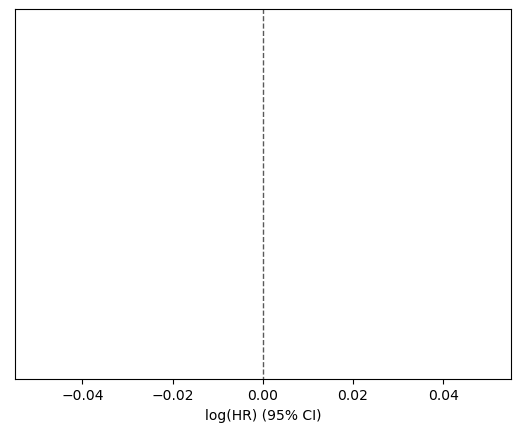

In [45]:
cph.plot()

In [46]:
cph.params_

Series([], Name: coef, dtype: float64)

In [47]:
cph.baseline_hazard_

,"(0, 0, 0, 0, 0)","(0, 0, 0, 0, 1)","(0, 0, 0, 1, 0)","(0, 0, 1, 0, 0)","(0, 1, 0, 0, 0)","(1, 0, 0, 0, 0)"
0.0,0.004089,0.007857,0.021908,0.009793,0.005103,0.079498
1.0,0.008022,0.003960,0.007587,0.005812,0.000000,0.018182
2.0,0.005661,0.010159,0.011103,0.010471,0.011299,0.055556
3.0,0.003708,0.003570,0.008283,0.013668,0.000000,0.012255
4.0,0.003817,0.030900,0.005939,0.004470,0.006539,0.022333
...,...,...,...,...,...,...
3284.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3285.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3286.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3316.0,0.454545,0.000000,0.000000,0.000000,0.000000,0.000000


<AxesSubplot: xlabel='log(HR) (95% CI)'>

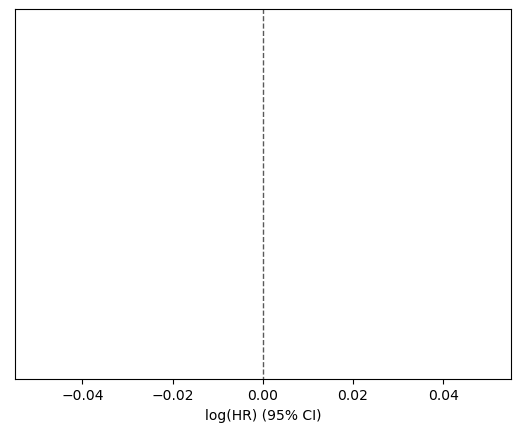

In [48]:
cph.plot()

In [49]:
cph.check_assumptions(hospit_full_hospit[['Nb_survie','Mort','CHOC','HEMOD','CHIMIO','Radiotherapie','Transfusion']], p_value_threshold=0.05, show_plots=True)

Proportional hazard assumption looks okay.


[]

## Test 1

In [50]:
#Test : https://timeseriesreasoning.com/contents/schoenfeld-residuals/
cph = CoxPHFitter()
cph.fit(hospit_full_hospit[['Nb_survie','Mort','CHOC','HEMOD','CHIMIO','Radiotherapie','Transfusion']], duration_col='Nb_survie', event_col='Mort')

cph.print_summary()  # access the individual results using cph.summary

<lifelines.CoxPHFitter: fitted with 156336 total observations, 53708 right-censored observations>
             duration col = 'Nb_survie'
                event col = 'Mort'
      baseline estimation = breslow
   number of observations = 156336
number of events observed = 102628
   partial log-likelihood = -1159734.74
         time fit was run = 2023-01-30 12:22:07 UTC

---
                coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                             
CHOC            0.51       1.67       0.05             0.41             0.62                 1.51                 1.86
HEMOD           0.06       1.06       0.01             0.05             0.07                 1.05                 1.08
CHIMIO          0.56       1.75       0.01             0.54             0.58                 1.71                 1.79
Radiotherapie   0.30       1.35       0.02             0.27             0.33                 1.30                 1.39
Transfusion     0.16       1.18       0.03             0.11             0.21                 1.12                 1.24

                cmp to     z      p   -log2(p)
covariate                                     
CHOC              0.00  9.67 <0.005      71.06
HEMOD             0.00  8.67 <0.005      57.70
CHIMIO            0.00 48.95 <0.005        inf
Radiotherapie     0.00 18.02 <0.005     238.82
Transfusion       0.00  6.38 <0.005      32.42
---
Concordance = 0.52
Partial AIC = 2319479.48
log-likelihood ratio test = 2367.80 on 5 df
-log2(p) of ll-ratio test = inf

In [51]:
#Use Lifelines to calculate the variance scaled Schoenfeld residuals for all regression variables in one go:
scaled_schoenfeld_residuals = cph.compute_residuals(training_dataframe=hospit_full_hospit[['Nb_survie','Mort','CHOC','HEMOD','CHIMIO','Radiotherapie','Transfusion']], kind='scaled_schoenfeld')
print(scaled_schoenfeld_residuals)

covariate        CHOC     HEMOD    CHIMIO  Radiotherapie  Transfusion
389         -2.270352 -1.917148 -2.334059      -2.126760    -2.008831
390        287.956808  0.016414 -0.391030      -0.180431    -0.062723
1501        -2.270352 -1.917148 -2.334059      -2.126760    -2.008831
1766        -2.270352 -1.917148 -2.334059      -2.126760    -2.008831
1767        -2.270352 -1.917148 -2.334059      -2.126760    -2.008831
...               ...       ...       ...            ...          ...
78784        0.000000  0.000000  0.000000       0.000000     0.000000
78785        0.000000  0.000000  0.000000       0.000000     0.000000
78786        0.000000  0.000000  0.000000       0.000000     0.000000
78787        0.000000  0.000000  0.000000       0.000000     0.000000
78788        0.000000  0.000000  0.000000       0.000000     0.000000

[102628 rows x 5 columns]


Pour la variable CHOC:


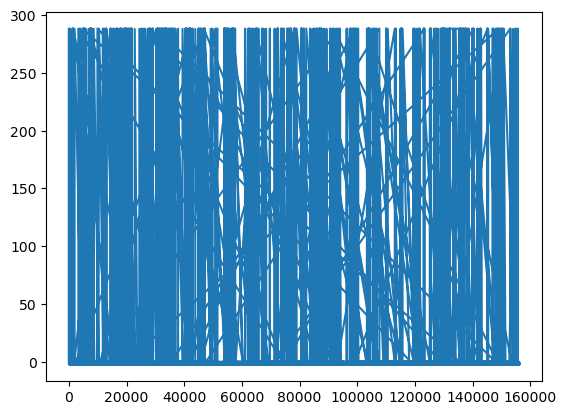

(array([364.25830917]), array([6.48590491e-54]), array([364.20725467]), array([6.63601397e-54]))
p-valeur du test de Ljung-Box: [6.48590491e-54]
p-valeur du test de Box-Pierce test: [6.48590491e-54]
Pour la variable HEMOD:


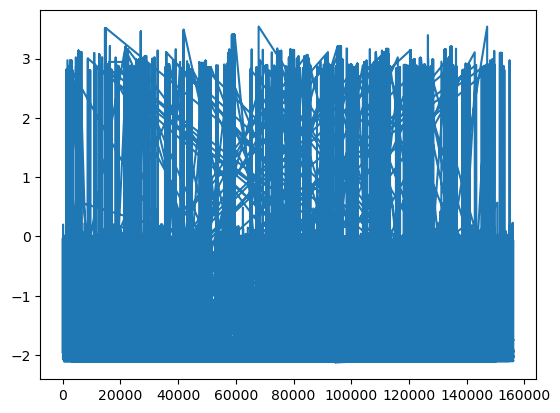

(array([2402993.03746737]), array([0.]), array([2402515.36730862]), array([0.]))
p-valeur du test de Ljung-Box: [0.]
p-valeur du test de Box-Pierce test: [0.]
Pour la variable CHIMIO:


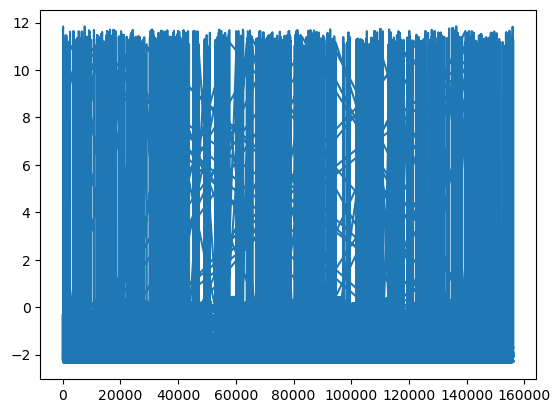

(array([428486.84553798]), array([0.]), array([428444.1533246]), array([0.]))
p-valeur du test de Ljung-Box: [0.]
p-valeur du test de Box-Pierce test: [0.]
Pour la variable Radiotherapie:


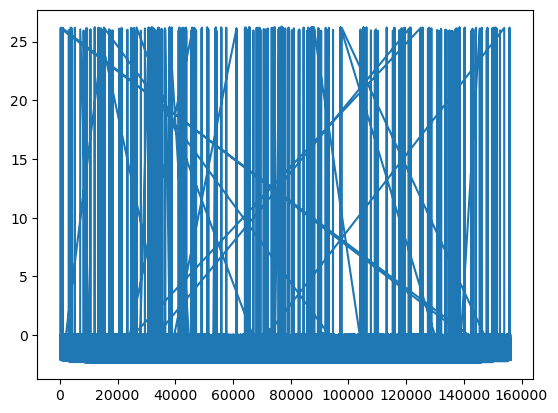

(array([666234.52105938]), array([0.]), array([666170.48762801]), array([0.]))
p-valeur du test de Ljung-Box: [0.]
p-valeur du test de Box-Pierce test: [0.]
Pour la variable Transfusion:


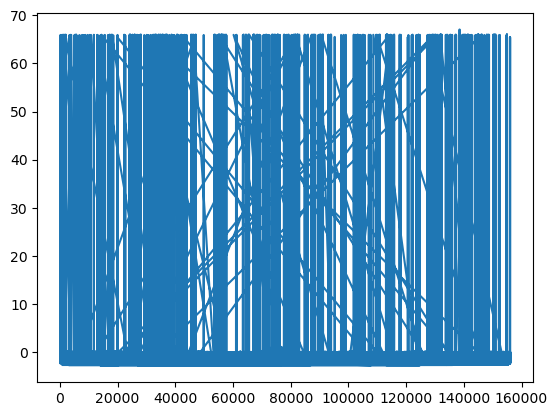

(array([299815.51671424]), array([0.]), array([299779.02170501]), array([0.]))
p-valeur du test de Ljung-Box: [0.]
p-valeur du test de Box-Pierce test: [0.]


In [52]:
from matplotlib import pyplot as plt
import statsmodels.stats.diagnostic as diag
Variables=['CHOC','HEMOD','CHIMIO','Radiotherapie','Transfusion']
for variable in Variables:
    print('Pour la variable ' + str(variable) + ':')
    #Let's plot the residuals for AGE against time:
    plt.plot(scaled_schoenfeld_residuals.index, scaled_schoenfeld_residuals[variable])
    plt.show()
    #Run the Ljung-Box test to test for auto-correlation in residuals up to lag 40
    result=diag.acorr_ljungbox(x=scaled_schoenfeld_residuals[variable], lags=[40], boxpierce=True, model_df=0, period=None, return_df=None)
    print(result)
    print('p-valeur du test de Ljung-Box: ' + str(result[1]))
    print('p-valeur du test de Box-Pierce test: ' + str(result[1]))

In [53]:
from lifelines.statistics import proportional_hazard_test
#Run the CPHFitter.proportional_hazards_test on the scaled Schoenfeld residuals
proportional_hazard_test(fitted_cox_model=cph, training_df=hospit_full_hospit[['Nb_survie','Mort','CHOC','HEMOD','CHIMIO','Radiotherapie','Transfusion']], time_transform='log', precomputed_residuals=scaled_schoenfeld_residuals)

<lifelines.StatisticalResult: proportional_hazard_test>
    time_transform = log
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 156336 total observations, 53708 right-censored observations>
         test_name = proportional_hazard_test

---
               test_statistic   p  -log2(p)
CHIMIO                    NaN NaN       NaN
CHOC                      NaN NaN       NaN
HEMOD                     NaN NaN       NaN
Radiotherapie             NaN NaN       NaN
Transfusion               NaN NaN       NaN

## Test 2

In [54]:
#Autre test : https://nextjournal.com/survivalanalysis/test-PH-assumption
## Test assumption
results = proportional_hazard_test(cph, hospit_full_hospit[['Nb_survie','Mort','CHOC','HEMOD','CHIMIO','Radiotherapie','Transfusion']], time_transform='rank')

In [55]:
results

<lifelines.StatisticalResult: proportional_hazard_test>
    time_transform = rank
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 156336 total observations, 53708 right-censored observations>
         test_name = proportional_hazard_test

---
               test_statistic      p  -log2(p)
CHIMIO                  96.29 <0.005     73.10
CHOC                   122.58 <0.005     92.23
HEMOD                 5505.91 <0.005       inf
Radiotherapie          534.78 <0.005    390.62
Transfusion            137.57 <0.005    103.12

In [ ]:
## Plot scaled Schoenfeld residuals
cph.check_assumptions(hospit_full_hospit[['Nb_survie','Mort','CHOC','HEMOD','CHIMIO','Radiotherapie','Transfusion']], p_value_threshold=0.05, show_plots=True, advice=True)

<AxesSubplot: xlabel='timeline'>

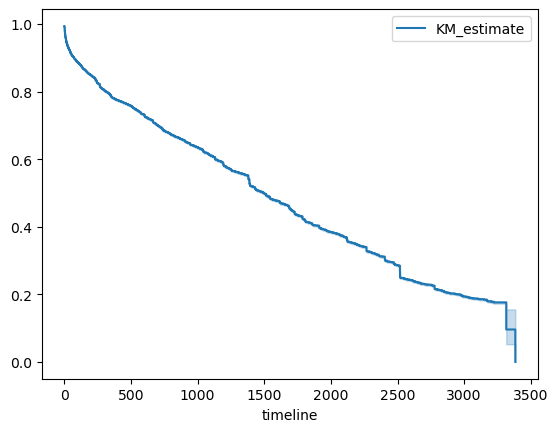

In [57]:
#Autre test: https://medium.com/the-researchers-guide/survival-analysis-in-python-km-estimate-cox-ph-and-aft-model-5533843c5d5d
from lifelines import KaplanMeierFitter
#hospit_full_hospit[['Nb_survie','Mort','CHOC','HEMOD','CHIMIO','Radiotherapie']]
T=hospit_full_hospit['Nb_survie']
E=hospit_full_hospit['Mort']
kmf = KaplanMeierFitter()
kmf.fit(durations = T, event_observed = E)
kmf.plot_survival_function()

Text(0.5, 1.0, 'Survival function')

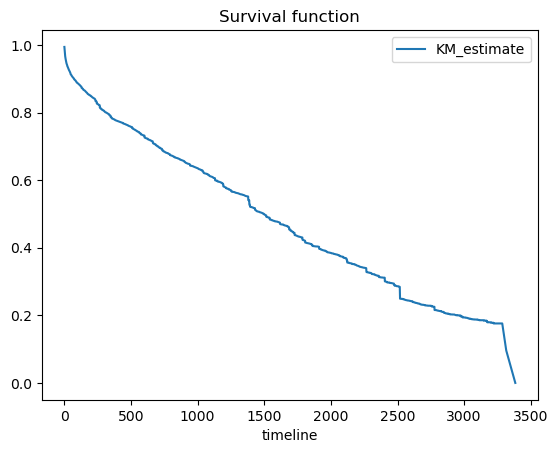

In [58]:
kmf.survival_function_.plot()
plt.title('Survival function')

<AxesSubplot: xlabel='timeline'>

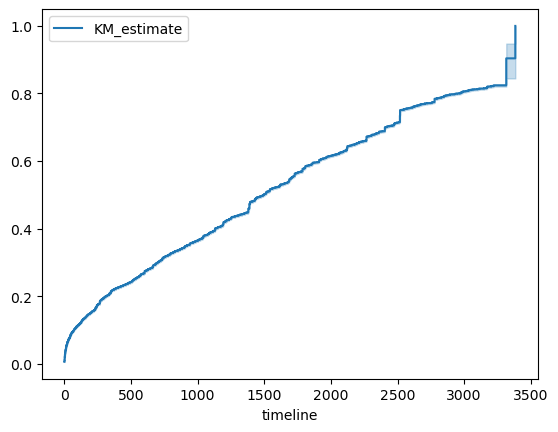

In [59]:
kmf.plot_cumulative_density()

In [61]:
from lifelines import WeibullFitter,\
                      ExponentialFitter,\
                      LogNormalFitter,\
                      LogLogisticFitter
# Instantiate each fitter
wb = WeibullFitter()
ex = ExponentialFitter()
log = LogNormalFitter()
loglogis = LogLogisticFitter()
# Fit to data
for model in [wb, ex, log, loglogis]:
    model.fit(durations = hospit_full_hospit["Nb_survie"]+1, event_observed = hospit_full_hospit["Mort"])
# Print AIC
print("The AIC value for", model.__class__.__name__, "is",  model.AIC_)

The AIC value for LogLogisticFitter is 1769264.1260133102


In [ ]:
from lifelines import WeibullAFTFitter
weibull_aft = WeibullAFTFitter()
weibull_aft.fit(hospit_full_hospit[['Nb_survie','Mort','CHOC','HEMOD','CHIMIO','Radiotherapie','Transfusion']], duration_col=hospit_full_hospit['Nb_survie'], event_col=hospit_full_hospit['Mort'])
weibull_aft.print_summary(3)

In [ ]:
print(weibull_aft.median_survival_time_)
print(weibull_aft.mean_survival_time_)

In [ ]:
plt.subplots(figsize=(10, 6))
weibull_aft.plot()

In [ ]:
plt.subplots(figsize=(10, 6))
weibull_aft.plot_partial_effects_on_outcome('age', range(50, 80, 10), cmap='coolwarm')

## Base patient Tristan

In [2]:
profil_patient=pd.read_csv("../data/profil_patient.csv")

In [3]:
profil_patient['CHOC']=profil_patient['CHOC'].astype(int)

In [4]:
profil_patient

,CODE_PATIENT,date_h0,y_nais,BEN_RES_DPT,BEN_SEX_COD,dte_deces,Mort,Nb_survie,Nb_hospit,CHOC,Nb_jours_sej,cat_age,cat_nb_hospit,cat_nb_jours_sej,cluster
0,P0,2011-11-22,1949,11,1,NaN,False,2596,9,0,23,1,1,1,0
1,P6,2013-12-05,1929,14,2,2015-03,True,456,8,0,51,2,1,1,1
2,P8,2015-07-02,1967,54,2,2015-08,True,41,3,1,43,0,1,1,2
3,P13,2011-05-19,1959,974,1,NaN,False,2783,2,0,3,0,1,0,3
4,P16,2010-03-18,1947,76,1,NaN,False,3210,9,0,28,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10046,P24302,2014-02-08,1920,29,1,2014-12,True,318,8,0,47,2,1,1,12
10047,P24303,2012-02-09,1927,61,1,2017-05,True,1924,12,0,86,2,2,2,6
10048,P24304,2010-07-27,1924,999,1,2010-08,True,5,1,0,10,2,0,1,13
10049,P24308,2011-11-25,1925,13,2,2013-03,True,484,7,0,99,2,1,2,1


In [5]:
from lifelines import CoxPHFitter
import matplotlib.pyplot as plt
cph = CoxPHFitter()
cph.fit(profil_patient[['Nb_survie','Mort','CHOC','cluster']], duration_col='Nb_survie', event_col='Mort', strata=['CHOC'])

cph.print_summary()  # access the individual results using cph.summary


<lifelines.CoxPHFitter: fitted with 10051 total observations, 3433 right-censored observations>
             duration col = 'Nb_survie'
                event col = 'Mort'
                   strata = CHOC
      baseline estimation = breslow
   number of observations = 10051
number of events observed = 6618
   partial log-likelihood = -55858.10
         time fit was run = 2023-02-05 19:00:20 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
cluster     0.02       1.02       0.00             0.01             0.02                 1.01                 1.02

            cmp to    z      p   -log2(p)
covariate                                
cluster       0.00 6.80 <0.005      36.52
---
Concordance = 0.53
Partial AIC = 111718.19
log-likelihood ratio test = 45.72 on 1 df
-log2(p) of ll-ratio test = 36.09

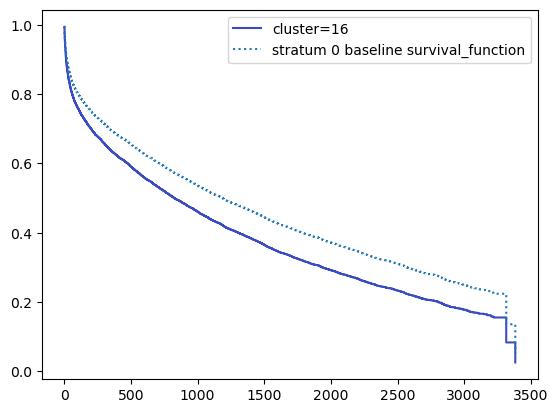

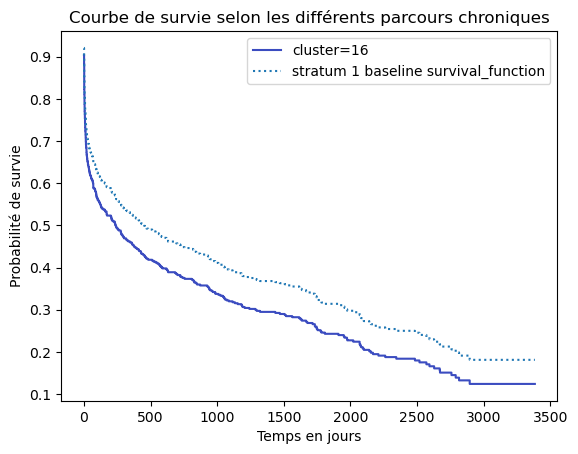

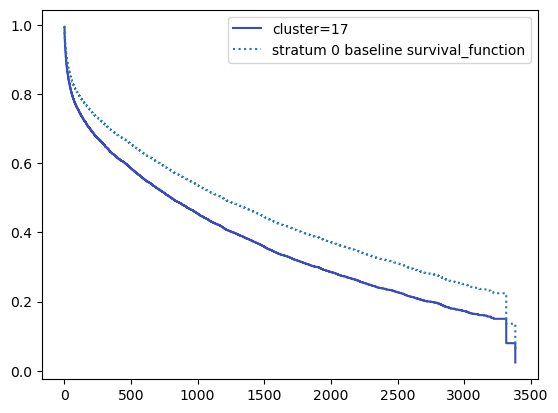

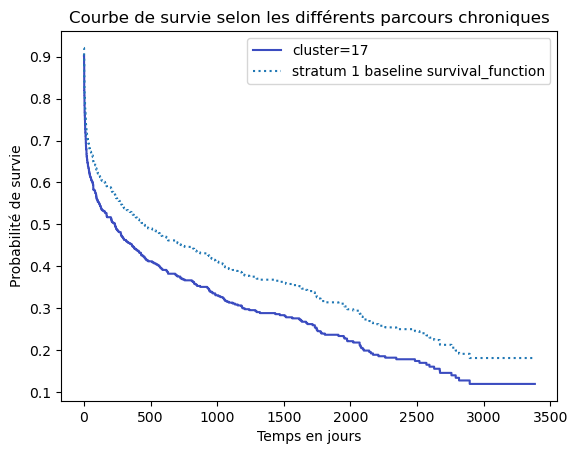

In [6]:
for i in range(16,18): 
        cph.plot_partial_effects_on_outcome(covariates=['cluster'], values=[i], cmap='coolwarm')
        plt.title("Courbe de survie selon les différents parcours chroniques")
        plt.xlabel("Temps en jours")
        plt.ylabel("Probabilité de survie")

<AxesSubplot: xlabel='log(HR) (95% CI)'>

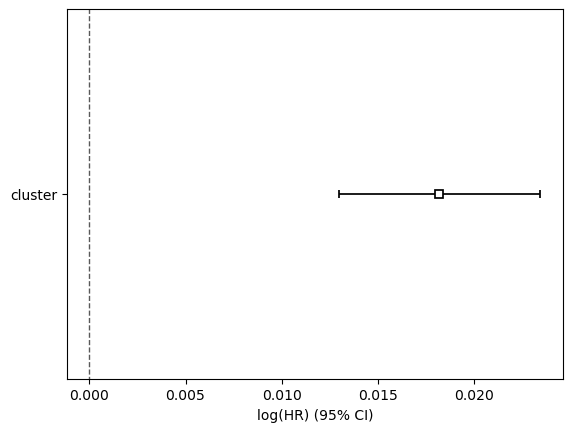

In [7]:
cph.plot()

The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 10051 total observations, 3433 right-censored observations>
         test_name = proportional_hazard_test

---
              test_statistic      p  -log2(p)
cluster km              8.62 <0.005      8.23
        rank           29.73 <0.005     24.26



1. Variable 'cluster' failed the non-proportional test: p-value is <5e-05.

   Advice 1: the functional form of the variable 'cluster' might be incorrect. That is, there may be
non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'cluster' using pd.cut, and then specify it in
`strata=['cluster', ...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


   Bootstrapping lowess lines. May take a moment...



KeyboardInterrupt: 

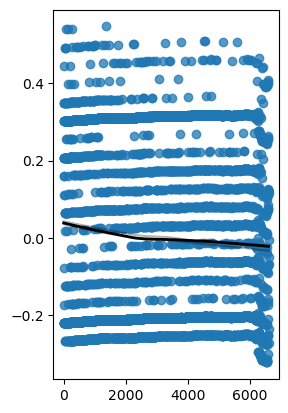

In [60]:
cph.check_assumptions(profil_patient[['Nb_survie','Mort','CHOC','cluster']], p_value_threshold=0.05, show_plots=True)

In [8]:
#Use Lifelines to calculate the variance scaled Schoenfeld residuals for all regression variables in one go:
scaled_schoenfeld_residuals = cph.compute_residuals(training_dataframe=profil_patient[['Nb_survie','Mort','CHOC','cluster']], kind='scaled_schoenfeld')
print(scaled_schoenfeld_residuals)

covariate   cluster
111        0.206907
149       -0.077441
302       -0.172224
418       -0.219616
512       -0.219616
...             ...
3875      -0.004241
3086       0.115825
327       -0.066856
9701      -0.270922
2481      -0.049311

[6618 rows x 1 columns]


Pour la variable cluster:


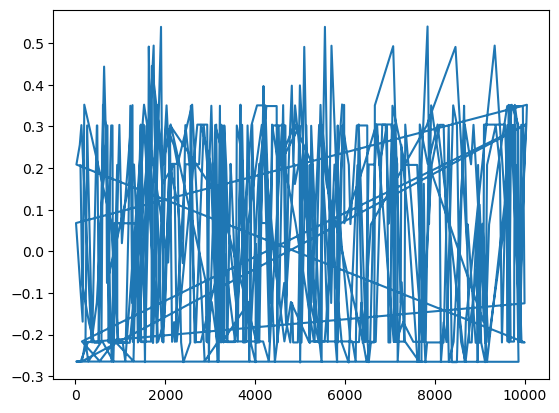

(array([42.5807469]), array([0.36062567]), array([42.4388625]), array([0.36633577]))
p-valeur du test de Ljung-Box: [0.36062567]
p-valeur du test de Box-Pierce test: [0.36062567]
Cela doit être plus grand que 0.05


In [9]:
import statsmodels.stats.diagnostic as diag
Variables=['cluster']
for variable in Variables:
    print('Pour la variable ' + str(variable) + ':')
    #Let's plot the residuals for AGE against time:
    plt.plot(scaled_schoenfeld_residuals.index[:500], scaled_schoenfeld_residuals[variable][:500])
    plt.show()
    #Run the Ljung-Box test to test for auto-correlation in residuals up to lag 40
    result=diag.acorr_ljungbox(x=scaled_schoenfeld_residuals[variable], lags=[40], boxpierce=True, model_df=0, period=None, return_df=None)
    print(result)
    print('p-valeur du test de Ljung-Box: ' + str(result[1]))
    print('p-valeur du test de Box-Pierce test: ' + str(result[1]))
    print('Cela doit être plus grand que 0.05')

In [10]:
from lifelines.statistics import proportional_hazard_test
#Run the CPHFitter.proportional_hazards_test on the scaled Schoenfeld residuals
proportional_hazard_test(fitted_cox_model=cph, training_df=profil_patient[['Nb_survie','Mort','CHOC','cluster']], time_transform='log', precomputed_residuals=scaled_schoenfeld_residuals)

/opt/mamba/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/mamba/lib/python3.10/site-packages/lifelines/statistics.py:925: RuntimeWarning: invalid value encountered in multiply
  T = (demeaned_times.values[:, None] * resids.values).sum(0) ** 2 / (
/opt/mamba/lib/python3.10/site-packages/numpy/core/_methods.py:48: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


<lifelines.StatisticalResult: proportional_hazard_test>
    time_transform = log
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 10051 total observations, 3433 right-censored observations>
         test_name = proportional_hazard_test

---
         test_statistic   p  -log2(p)
cluster             NaN NaN       NaN

In [65]:
cph.fit(profil_patient[['Nb_survie','Mort','CHOC','cluster','BEN_SEX_COD','Nb_hospit','Nb_jours_sej','cat_age','cat_nb_hospit','cat_nb_jours_sej']], duration_col='Nb_survie', event_col='Mort', strata=['CHOC'], formula="bs(cluster, df=4, lower_bound=0 , upper_bound=18) + BEN_SEX_COD + Nb_hospit + Nb_jours_sej + cat_age + cat_nb_hospit + cat_nb_jours_sej")
cph.print_summary(model="spline_model")

<lifelines.CoxPHFitter: fitted with 10051 total observations, 3433 right-censored observations>
             duration col = 'Nb_survie'
                event col = 'Mort'
                   strata = CHOC
      baseline estimation = breslow
   number of observations = 10051
number of events observed = 6618
   partial log-likelihood = -55051.34
         time fit was run = 2023-02-05 19:54:49 UTC
                    model = spline_model

---
                                                       coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                                    
BEN_SEX_COD                                           -0.03       0.97       0.04            -0.11             0.05                 0.90                 1.05
Nb_hospit                                             -0.04       0.96       0.00            -0.05            -0.03                 0.95                 0.97
Nb_jours_sej                                           0.00       1.00       0.00             0.00             0.01                 1.00                 1.01
bs(cluster, df=4, lower_bound=0 , upper_bound=18)[1]  -0.04       0.96       0.10            -0.23             0.15                 0.80                 1.16
bs(cluster, df=4, lower_bound=0 , upper_bound=18)[2]  -0.19       0.82       0.16            -0.51             0.12                 0.60                 1.13
bs(cluster, df=4, lower_bound=0 , upper_bound=18)[3]   0.78       2.18       0.21             0.36             1.20                 1.44                 3.31
bs(cluster, df=4, lower_bound=0 , upper_bound=18)[4]  -0.59       0.56       0.27            -1.12            -0.06                 0.33                 0.94
cat_age                                                0.58       1.78       0.03             0.53             0.63                 1.69                 1.88
cat_nb_hospit                                         -0.21       0.81       0.05            -0.31            -0.11                 0.73                 0.89
cat_nb_jours_sej                                      -0.00       1.00       0.04            -0.07             0.07                 0.93                 1.07

                                                       cmp to      z      p   -log2(p)
covariate                                                                             
BEN_SEX_COD                                              0.00  -0.72   0.47       1.08
Nb_hospit                                                0.00 -10.83 <0.005      88.40
Nb_jours_sej                                             0.00  12.79 <0.005     121.93
bs(cluster, df=4, lower_bound=0 , upper_bound=18)[1]     0.00  -0.41   0.68       0.56
bs(cluster, df=4, lower_bound=0 , upper_bound=18)[2]     0.00  -1.19   0.23       2.10
bs(cluster, df=4, lower_bound=0 , upper_bound=18)[3]     0.00   3.68 <0.005      12.05
bs(cluster, df=4, lower_bound=0 , upper_bound=18)[4]     0.00  -2.17   0.03       5.06
cat_age                                                  0.00  21.31 <0.005     332.38
cat_nb_hospit                                            0.00  -4.22 <0.005      15.35
cat_nb_jours_sej                                         0.00  -0.06   0.96       0.07
---
Concordance = 0.65
Partial AIC = 110122.68
log-likelihood ratio test = 1659.23 on 10 df
-log2(p) of ll-ratio test = inf

<AxesSubplot: xlabel='log(HR) (95% CI)'>

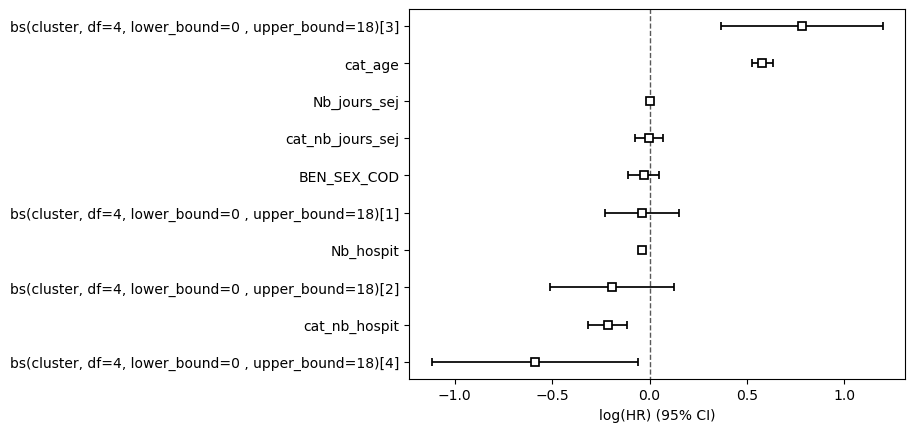

In [66]:
cph.plot()

In [67]:
#Use Lifelines to calculate the variance scaled Schoenfeld residuals for all regression variables in one go:
scaled_schoenfeld_residuals = cph.compute_residuals(training_dataframe=profil_patient[['Nb_survie','Mort','CHOC','cluster','BEN_SEX_COD','Nb_hospit','Nb_jours_sej','cat_age','cat_nb_hospit','cat_nb_jours_sej']], kind='scaled_schoenfeld')
print(scaled_schoenfeld_residuals)

covariate  BEN_SEX_COD  Nb_hospit  Nb_jours_sej  \
111           2.548320   0.367733      0.026434   
149           0.827802  -0.076076      0.007987   
302           1.507404  -0.225405      0.025266   
418           1.238993  -0.091348     -0.017048   
512           0.938459  -0.261079      0.022846   
...                ...        ...           ...   
3875         -7.161363  -0.061925     -0.023776   
3086         -3.140719   2.254081      0.050342   
327          -5.734012  -0.790800      0.051258   
9701          0.168565  -0.226599      0.005170   
2481         -8.378682  -0.336243      0.001502   

covariate  bs(cluster, df=4, lower_bound=0 , upper_bound=18)[1]  \
111                                                -7.788275      
149                                                -1.070243      
302                                                20.989957      
418                                                 2.038050      
512                                                 

Pour la variable bs(cluster, df=4, lower_bound=0 , upper_bound=18)[1]:


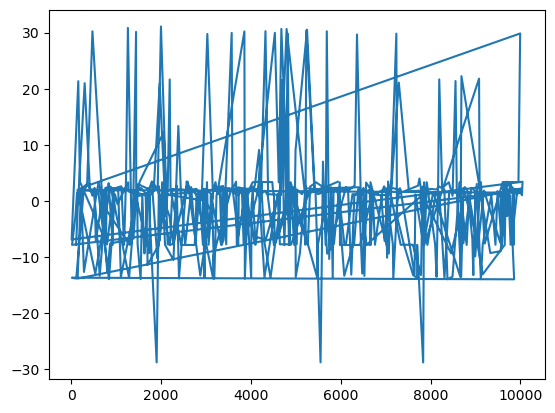

(array([33.66531986]), array([0.74979978]), array([33.56795665]), array([0.75366763]))
p-valeur du test de Ljung-Box: [0.74979978]
p-valeur du test de Box-Pierce test: [0.74979978]
Cela doit être plus grand que 0.05
Pour la variable bs(cluster, df=4, lower_bound=0 , upper_bound=18)[2]:


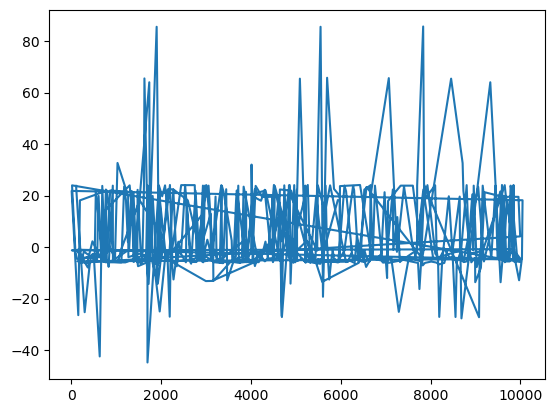

(array([75.07616829]), array([0.00065153]), array([74.842463]), array([0.00069203]))
p-valeur du test de Ljung-Box: [0.00065153]
p-valeur du test de Box-Pierce test: [0.00065153]
Cela doit être plus grand que 0.05
Pour la variable bs(cluster, df=4, lower_bound=0 , upper_bound=18)[3]:


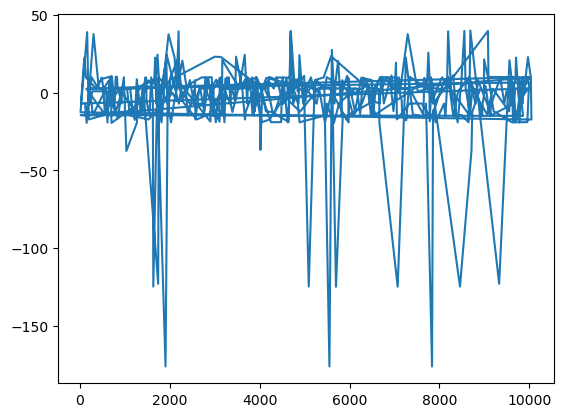

(array([59.99316613]), array([0.02190404]), array([59.80752531]), array([0.02274924]))
p-valeur du test de Ljung-Box: [0.02190404]
p-valeur du test de Box-Pierce test: [0.02190404]
Cela doit être plus grand que 0.05
Pour la variable bs(cluster, df=4, lower_bound=0 , upper_bound=18)[4]:


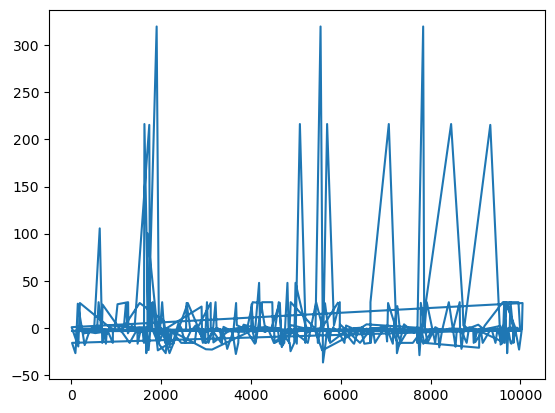

(array([62.91016918]), array([0.01185488]), array([62.69075049]), array([0.01243026]))
p-valeur du test de Ljung-Box: [0.01185488]
p-valeur du test de Box-Pierce test: [0.01185488]
Cela doit être plus grand que 0.05
Pour la variable BEN_SEX_COD:


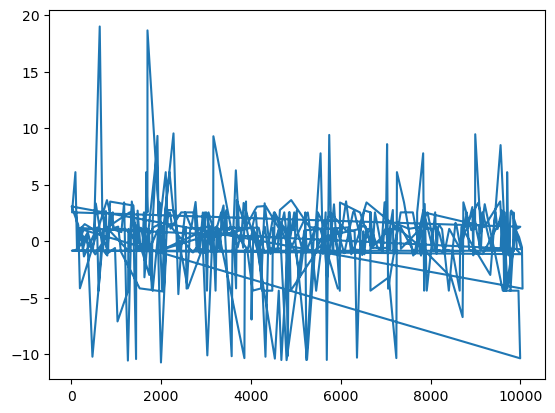

(array([43.81451422]), array([0.31288921]), array([43.66845107]), array([0.3183528]))
p-valeur du test de Ljung-Box: [0.31288921]
p-valeur du test de Box-Pierce test: [0.31288921]
Cela doit être plus grand que 0.05
Pour la variable Nb_hospit:


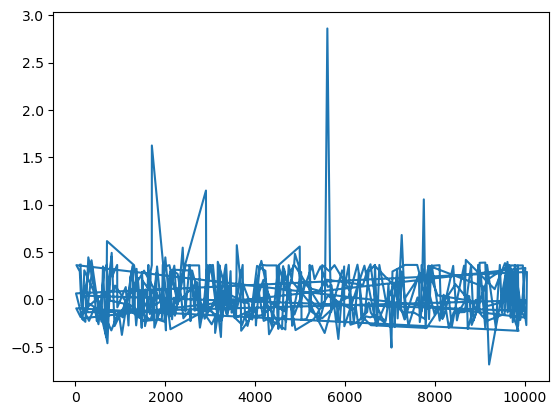

(array([118.70781127]), array([9.91330782e-10]), array([118.3073626]), array([1.13746925e-09]))
p-valeur du test de Ljung-Box: [9.91330782e-10]
p-valeur du test de Box-Pierce test: [9.91330782e-10]
Cela doit être plus grand que 0.05
Pour la variable Nb_jours_sej:


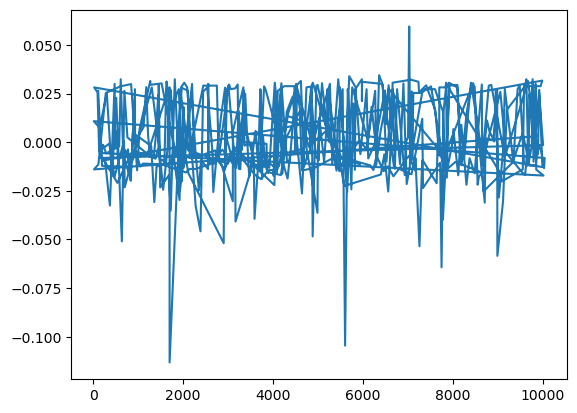

(array([116.02562096]), array([2.48030703e-09]), array([115.6244802]), array([2.84262013e-09]))
p-valeur du test de Ljung-Box: [2.48030703e-09]
p-valeur du test de Box-Pierce test: [2.48030703e-09]
Cela doit être plus grand que 0.05
Pour la variable cat_age:


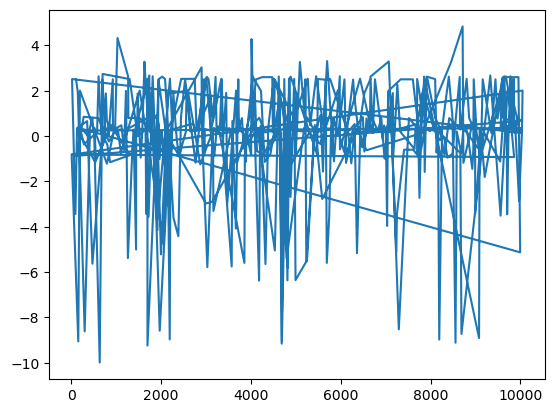

(array([37.1239985]), array([0.60045154]), array([37.01034829]), array([0.60559954]))
p-valeur du test de Ljung-Box: [0.60045154]
p-valeur du test de Box-Pierce test: [0.60045154]
Cela doit être plus grand que 0.05
Pour la variable cat_nb_hospit:


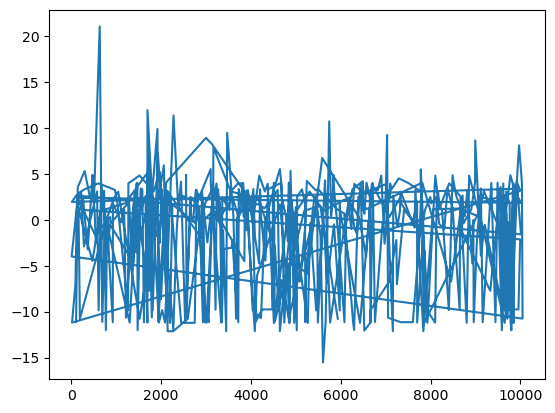

(array([75.50225465]), array([0.00058344]), array([75.22841173]), array([0.00062637]))
p-valeur du test de Ljung-Box: [0.00058344]
p-valeur du test de Box-Pierce test: [0.00058344]
Cela doit être plus grand que 0.05
Pour la variable cat_nb_jours_sej:


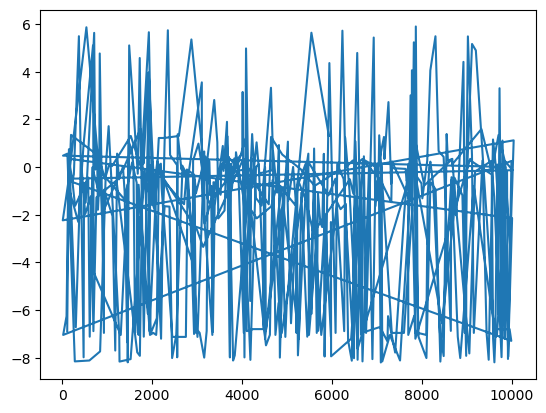

(array([845.23968678]), array([1.93381199e-151]), array([842.64908198]), array([6.66331013e-151]))
p-valeur du test de Ljung-Box: [1.93381199e-151]
p-valeur du test de Box-Pierce test: [1.93381199e-151]
Cela doit être plus grand que 0.05


In [68]:
import statsmodels.stats.diagnostic as diag
Variables=['bs(cluster, df=4, lower_bound=0 , upper_bound=18)[1]','bs(cluster, df=4, lower_bound=0 , upper_bound=18)[2]','bs(cluster, df=4, lower_bound=0 , upper_bound=18)[3]','bs(cluster, df=4, lower_bound=0 , upper_bound=18)[4]','BEN_SEX_COD','Nb_hospit','Nb_jours_sej','cat_age','cat_nb_hospit','cat_nb_jours_sej']
for variable in Variables:
    print('Pour la variable ' + str(variable) + ':')
    #Let's plot the residuals for AGE against time:
    plt.plot(scaled_schoenfeld_residuals.index[:500], scaled_schoenfeld_residuals[variable][:500])
    plt.show()
    #Run the Ljung-Box test to test for auto-correlation in residuals up to lag 40
    result=diag.acorr_ljungbox(x=scaled_schoenfeld_residuals[variable], lags=[40], boxpierce=True, model_df=0, period=None, return_df=None)
    print(result)
    print('p-valeur du test de Ljung-Box: ' + str(result[1]))
    print('p-valeur du test de Box-Pierce test: ' + str(result[1]))
    print('Cela doit être plus grand que 0.05')

In [ ]:
cph.check_assumptions(profil_patient[['Nb_survie','Mort','CHOC','cluster','BEN_SEX_COD','Nb_hospit','Nb_jours_sej','cat_age','cat_nb_hospit','cat_nb_jours_sej']], show_plots=True, p_value_threshold=0.05)

In [56]:
cph = CoxPHFitter()
cph.fit(profil_patient[['Nb_survie','Mort','CHOC','cluster','BEN_SEX_COD']], duration_col='Nb_survie', event_col='Mort', strata=['CHOC'], formula="bs(cluster, df=4, lower_bound=0 , upper_bound=18) + BEN_SEX_COD")
cph.print_summary(model="spline_model")

<lifelines.CoxPHFitter: fitted with 10051 total observations, 3433 right-censored observations>
             duration col = 'Nb_survie'
                event col = 'Mort'
                   strata = CHOC
      baseline estimation = breslow
   number of observations = 10051
number of events observed = 6618
   partial log-likelihood = -55481.89
         time fit was run = 2023-02-05 19:46:32 UTC
                    model = spline_model

---
                                                       coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                                    
BEN_SEX_COD                                            0.30       1.35       0.03             0.23             0.36                 1.26                 1.44
bs(cluster, df=4, lower_bound=0 , upper_bound=18)[1]   0.45       1.58       0.08             0.29             0.62                 1.34                 1.85
bs(cluster, df=4, lower_bound=0 , upper_bound=18)[2]  -2.98       0.05       0.13            -3.23            -2.73                 0.04                 0.07
bs(cluster, df=4, lower_bound=0 , upper_bound=18)[3]   4.33      75.95       0.19             3.96             4.70                52.44               110.00
bs(cluster, df=4, lower_bound=0 , upper_bound=18)[4]  -3.66       0.03       0.27            -4.19            -3.13                 0.02                 0.04

                                                       cmp to      z      p   -log2(p)
covariate                                                                             
BEN_SEX_COD                                              0.00   8.88 <0.005      60.34
bs(cluster, df=4, lower_bound=0 , upper_bound=18)[1]     0.00   5.53 <0.005      24.88
bs(cluster, df=4, lower_bound=0 , upper_bound=18)[2]     0.00 -23.34 <0.005     397.95
bs(cluster, df=4, lower_bound=0 , upper_bound=18)[3]     0.00  22.91 <0.005     383.43
bs(cluster, df=4, lower_bound=0 , upper_bound=18)[4]     0.00 -13.59 <0.005     137.42
---
Concordance = 0.62
Partial AIC = 110973.78
log-likelihood ratio test = 798.13 on 5 df
-log2(p) of ll-ratio test = 563.17

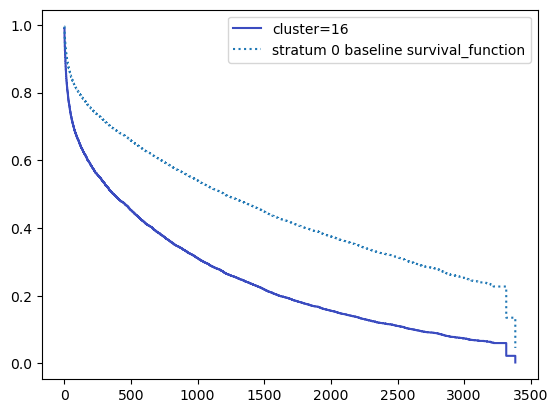

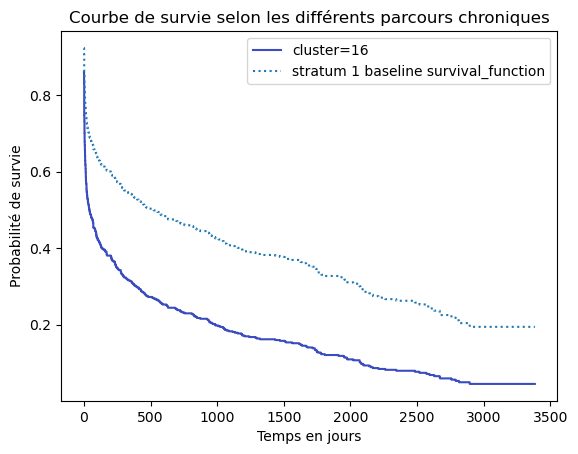

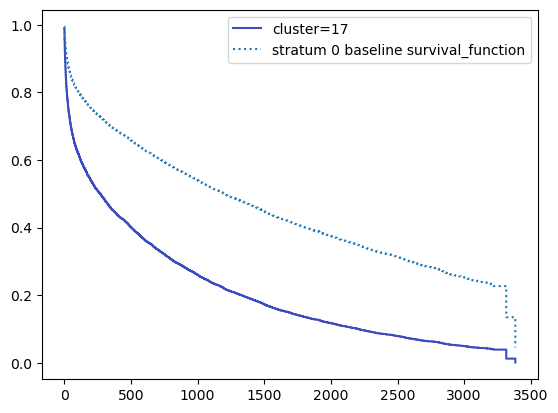

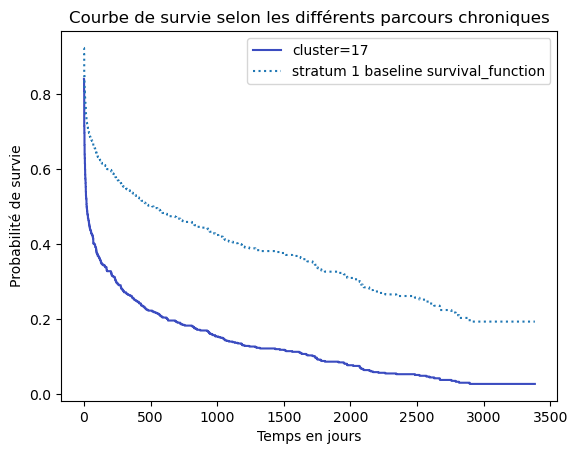

In [51]:
for i in range(16,18): 
        cph.plot_partial_effects_on_outcome(covariates=['cluster'], values=[i], cmap='coolwarm')
        plt.title("Courbe de survie selon les différents parcours chroniques")
        plt.xlabel("Temps en jours")
        plt.ylabel("Probabilité de survie")

<AxesSubplot: xlabel='log(HR) (95% CI)'>

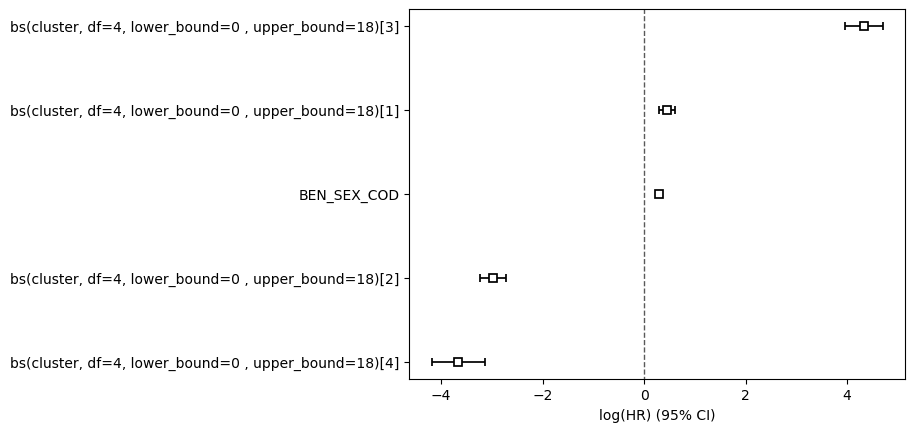

In [63]:
cph.plot()

Pour la variable bs(cluster, df=4, lower_bound=0 , upper_bound=18)[1]:


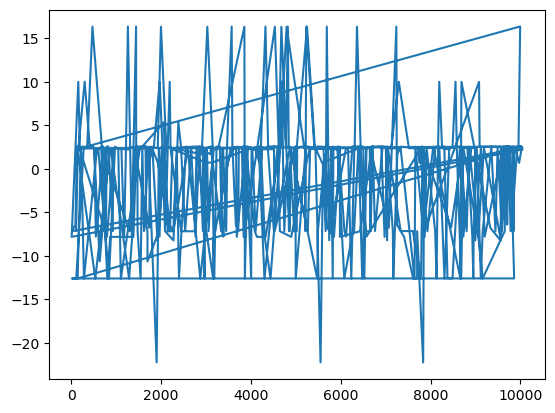

(array([40.73774348]), array([0.43782323]), array([40.60133037]), array([0.44376609]))
p-valeur du test de Ljung-Box: [0.43782323]
p-valeur du test de Box-Pierce test: [0.43782323]
Cela doit être plus grand que 0.05
Pour la variable bs(cluster, df=4, lower_bound=0 , upper_bound=18)[2]:


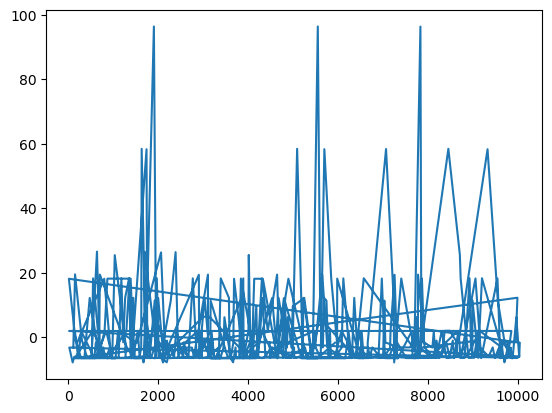

(array([52.67108349]), array([0.08649805]), array([52.48336918]), array([0.08929038]))
p-valeur du test de Ljung-Box: [0.08649805]
p-valeur du test de Box-Pierce test: [0.08649805]
Cela doit être plus grand que 0.05
Pour la variable bs(cluster, df=4, lower_bound=0 , upper_bound=18)[3]:


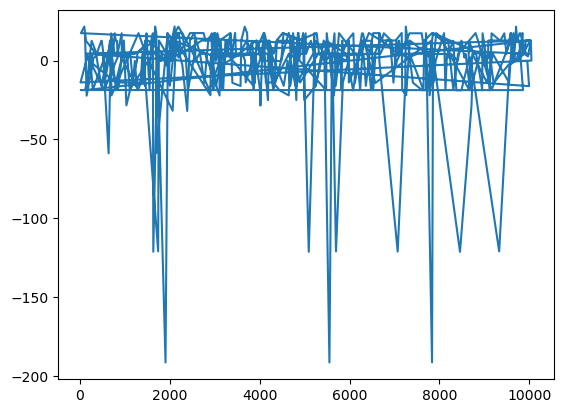

(array([55.07395454]), array([0.05669073]), array([54.86797306]), array([0.05884792]))
p-valeur du test de Ljung-Box: [0.05669073]
p-valeur du test de Box-Pierce test: [0.05669073]
Cela doit être plus grand que 0.05
Pour la variable bs(cluster, df=4, lower_bound=0 , upper_bound=18)[4]:


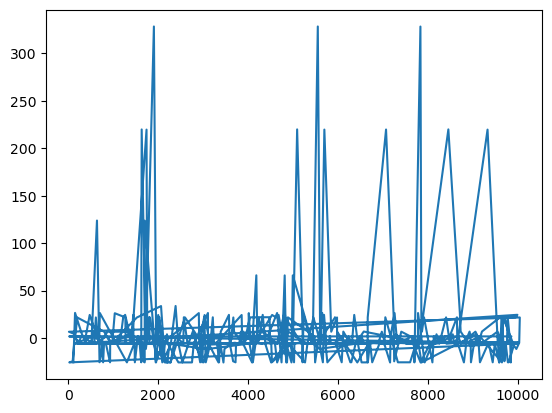

(array([54.08323709]), array([0.06771589]), array([53.90396818]), array([0.0698924]))
p-valeur du test de Ljung-Box: [0.06771589]
p-valeur du test de Box-Pierce test: [0.06771589]
Cela doit être plus grand que 0.05
Pour la variable BEN_SEX_COD:


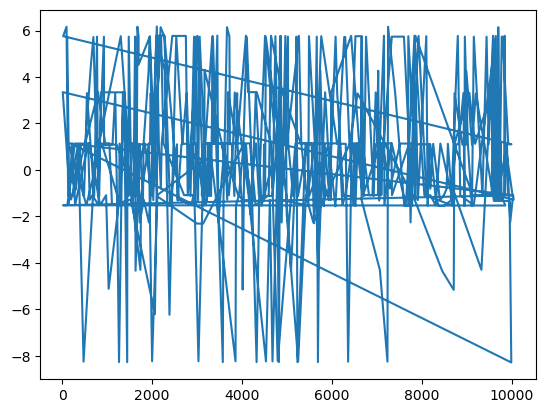

(array([56.79273552]), array([0.04118305]), array([56.58683391]), array([0.04282191]))
p-valeur du test de Ljung-Box: [0.04118305]
p-valeur du test de Box-Pierce test: [0.04118305]
Cela doit être plus grand que 0.05


In [64]:
#Use Lifelines to calculate the variance scaled Schoenfeld residuals for all regression variables in one go:
scaled_schoenfeld_residuals = cph.compute_residuals(training_dataframe=profil_patient[['Nb_survie','Mort','CHOC','cluster','BEN_SEX_COD','Nb_hospit','Nb_jours_sej','cat_age','cat_nb_hospit','cat_nb_jours_sej']], kind='scaled_schoenfeld')
#print(scaled_schoenfeld_residuals)
import statsmodels.stats.diagnostic as diag
Variables=['bs(cluster, df=4, lower_bound=0 , upper_bound=18)[1]','bs(cluster, df=4, lower_bound=0 , upper_bound=18)[2]','bs(cluster, df=4, lower_bound=0 , upper_bound=18)[3]','bs(cluster, df=4, lower_bound=0 , upper_bound=18)[4]','BEN_SEX_COD']
for variable in Variables:
    print('Pour la variable ' + str(variable) + ':')
    #Let's plot the residuals for AGE against time:
    plt.plot(scaled_schoenfeld_residuals.index[:500], scaled_schoenfeld_residuals[variable][:500])
    plt.show()
    #Run the Ljung-Box test to test for auto-correlation in residuals up to lag 40
    result=diag.acorr_ljungbox(x=scaled_schoenfeld_residuals[variable], lags=[40], boxpierce=True, model_df=0, period=None, return_df=None)
    print(result)
    print('p-valeur du test de Ljung-Box: ' + str(result[1]))
    print('p-valeur du test de Box-Pierce test: ' + str(result[1]))
    print('Cela doit être plus grand que 0.05')

The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 10051 total observations, 3433 right-censored observations>
         test_name = proportional_hazard_test

---
                                                           test_statistic      p  -log2(p)
BEN_SEX_COD                                          km             29.29 <0.005     23.94
                                                     rank           38.26 <0.005     30.59
bs(cluster, df=4, lower_bound=0 , upper_bound=18)[1] km             22.25 <0.005     18.67
                                                     rank           20.67 <0.005     17.48
bs(cluster, df=4, lower_bound=0 , upper_bound=18)[2] km             29.20 <0.005     23.87
                                                     rank           18.27 <0.005     15.67
bs(cluster, df=4, lower_bound=0 , upper_bound=18)[3] km              1.17   0.28      1.84
                                                     rank            0.90   0.34      1.55
bs(cluster, df=4, lower_bound=0 , upper_bound=18)[4] km              3.48   0.06      4.01
                                                     rank            8.78 <0.005      8.36



1. Variable 'BEN_SEX_COD' failed the non-proportional test: p-value is <5e-05.

   Advice: with so few unique values (only 2), you can include `strata=['BEN_SEX_COD', ...]` in the
call in `.fit`. See documentation in link [E] below.

   Bootstrapping lowess lines. May take a moment...


2. Variable 'bs(cluster, df=4, lower_bound=0 , upper_bound=18)[1]' failed the non-proportional test: p-value is <5e-05.

   Advice 1: the functional form of the variable 'bs(cluster, df=4, lower_bound=0 ,
upper_bound=18)[1]' might be incorrect. That is, there may be non-linear terms missing. The
proportional hazard test used is very sensitive to incorrect functional forms. See documentation in
link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'bs(cluster, df=4, lower_bound=0 , upper_bound=18)[1]' using
pd.cut, and then specify it in `strata=['bs(cluster, df=4, lower_bound=0 , upper_bound=18)[1]',
...]` in the call in `.fit`. See documentation in link [B] below.

[[<AxesSubplot: xlabel='rank-transformed time\n(p=0.0000)'>,
  <AxesSubplot: xlabel='km-transformed time\n(p=0.0000)'>],
 [<AxesSubplot: xlabel='rank-transformed time\n(p=0.0000)'>,
  <AxesSubplot: xlabel='km-transformed time\n(p=0.0000)'>],
 [<AxesSubplot: xlabel='rank-transformed time\n(p=0.0000)'>,
  <AxesSubplot: xlabel='km-transformed time\n(p=0.0000)'>],
 [<AxesSubplot: xlabel='rank-transformed time\n(p=0.0030)'>,
  <AxesSubplot: xlabel='km-transformed time\n(p=0.0622)'>]]

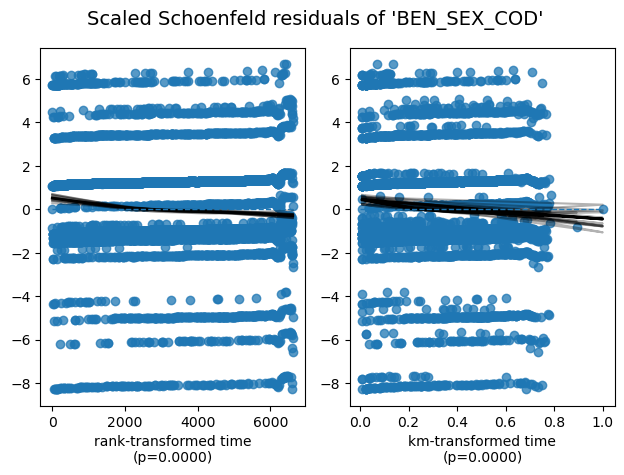

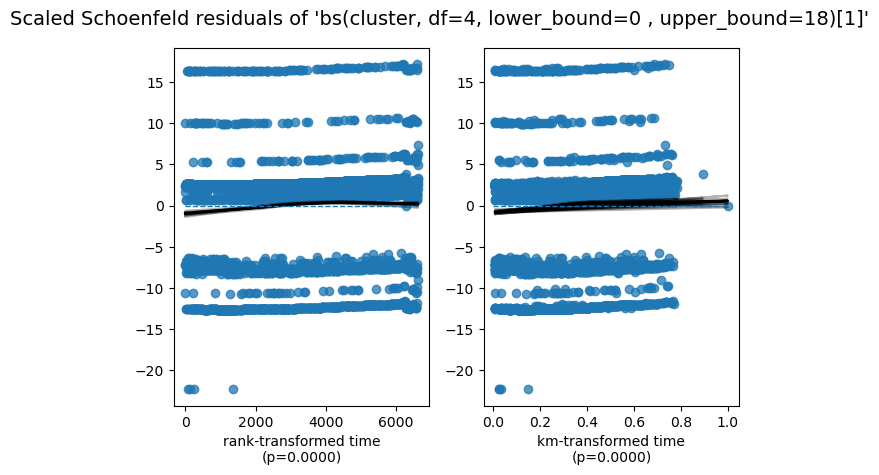

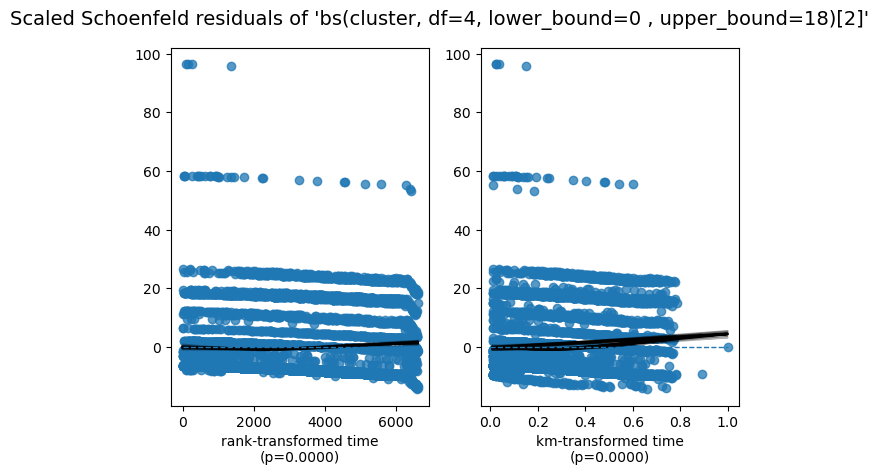

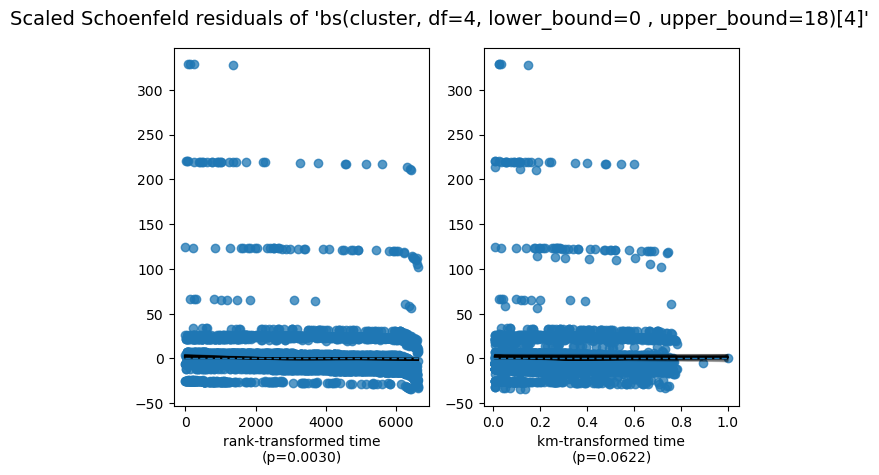

In [94]:
cph.check_assumptions(profil_patient[['Nb_survie','Mort','CHOC','cluster','BEN_SEX_COD']], p_value_threshold=0.05, show_plots=True)